In [5]:
# import data using pandas (json format)
import pandas
import codecs

fileName = "abstract10000.json"
import json
from pprint import pprint
with open(fileName) as f:
    data = json.load(f)

from pandas.io.json import json_normalize
sample=json_normalize(data['items'])
pprint(sample.iloc[0:10])

# abstract - gene mappings 
fileName = "gene2pubtator.txt"
doc = codecs.open(fileName,'rU','UTF-16')
g2a = pandas.read_csv(fileName, sep='\t')
pprint(g2a.iloc[0:10])


                                            abstract    docid  \
0  A Brazilian family with hereditary gingival fi...  7800376   
1  Necrosis that occurs in a salivary gland neopl...  7800377   
2  Seventy-nine patients with oral leukoplakia th...  7800378   
3  Proliferative verrucous leukoplakia is a slow-...  7800379   
4  We report the case of a patient in whom oral s...  7800380   
5  Studies of the mechanisms of pathogenesis of p...  7800381   
6  Multiple mechanisms are involved in the pathol...  7800382   
7  The authors examined 85 children who had serio...  7800389   
8  The authors report a case of a simultaneous ex...  7800391   
9                                                NaN  7800392   

                                               title  
0  Hereditary gingival fibromatosis. Report of an...  
1  Necrosis in benign salivary gland neoplasms. N...  
2  A clinical trial of antioxidant supplements in...  
3  Proliferative verrucous leukoplakia. Four case...  
4  A case

/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


      PMID NCBI_Gene                     Mentions        Resource
0  1000011      7356      blastokinin|uteroglobin  MESH|GNormPlus
1  1000045      2006                 tropoelastin  MESH|GNormPlus
2  1000084      7018                  transferrin  GNormPlus|MESH
3  1000327      4199         malate dehydrogenase  GNormPlus|MESH
4  1000392      4151                    myoglobin  MESH|GNormPlus
5  1000443      5972                        renin  MESH|GNormPlus
6   100058      2720           beta-galactosidase  GNormPlus|MESH
7  1000658      4012                  Oxytocinase  MESH|GNormPlus
8  1000796      3145  uroporphyrinogen I synthase  GNormPlus|MESH
9  1000841      5972                        renin  MESH|GNormPlus


In [6]:

#g2a.groupby(['PMID']).size().reset_index()[0:10]
sample['docid']=sample['docid'].astype('int')
sample.rename(columns={'docid':'PMID'}, inplace=True)
print(sample[0:10])
print(g2a[0:10])


                                            abstract     PMID  \
0  A Brazilian family with hereditary gingival fi...  7800376   
1  Necrosis that occurs in a salivary gland neopl...  7800377   
2  Seventy-nine patients with oral leukoplakia th...  7800378   
3  Proliferative verrucous leukoplakia is a slow-...  7800379   
4  We report the case of a patient in whom oral s...  7800380   
5  Studies of the mechanisms of pathogenesis of p...  7800381   
6  Multiple mechanisms are involved in the pathol...  7800382   
7  The authors examined 85 children who had serio...  7800389   
8  The authors report a case of a simultaneous ex...  7800391   
9                                                NaN  7800392   

                                               title  
0  Hereditary gingival fibromatosis. Report of an...  
1  Necrosis in benign salivary gland neoplasms. N...  
2  A clinical trial of antioxidant supplements in...  
3  Proliferative verrucous leukoplakia. Four case...  
4  A case

In [7]:
# estimate the average sentence length
import re
import statistics
size=[]
for line in sample.abstract:
    line=str(line)
    line=line.strip()
    stns=re.split('\. |\? |\! ',line)
    size.append(len(stns)-1)

statistics.mean([i for i in size if(i!=0)])

6.2243618450515

In [8]:
# input as matrix
sampleAbstract = sample.abstract.as_matrix()

# basic preprocessing
# normalize the token
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from gensim.parsing.porter import PorterStemmer

#nltk.download('stopwords')
#nltk.download('punkt')
# word_tokenize
def WordTokenizerFct(samples):
    samplesWordTokenizer = []
    for line in samples:
        tokens = word_tokenize(str(line))
        samplesWordTokenizer.append(tokens)
    return(samplesWordTokenizer)

samplesWordTokenizer=WordTokenizerFct(sampleAbstract)

# remove the stopwords
nltk_words = list(stopwords.words('english'))
def StopwordsRemove(samples): 
    sampleTokenStopwordsRemoved = []
    for line in samples:
        tokenStopwordsRemoved = [w for w in line if not w in nltk_words]
        sampleTokenStopwordsRemoved.append(tokenStopwordsRemoved)
    return(sampleTokenStopwordsRemoved)

# remove stemming
def stemming(samples):
    newSamples = []
    for line in samples:
        newTokens = []
        for elmt in line:
            newTokens.append(PorterStemmer().stem(elmt))
        newSamples.append(newTokens)
    return(newSamples)

#samplesWordTokenizer = StopwordsRemove(samplesWordTokenizer)

samplesWordTokenizerStemmed = stemming(samplesWordTokenizer)

/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [9]:
# preprocess the abstract + map and gene symbol convention
import re
sentenceResult = []
for line in sample.as_matrix():
    pmid = line[1]
    abstract = line[0]
    title = line[2]
    abstract=str(abstract)
    # for multiple paragrams
    abstract = re.sub(r"[\r\n]", " ", abstract)
    abstract = re.sub(r"\/"," ", abstract)
    # for the end sentence
    abstract = re.sub(r"\.\ ","$", abstract)
    abstract = re.sub(r"\!\ ","$", abstract)
    abstract = re.sub(r"\?\ ","$", abstract)
    #print(abstract)
    
    if(len(abstract)==0):
        continue
    if(len(g2a[g2a['PMID'].isin([pmid])].as_matrix())>1):
        #print(g2a[g2a['PMID'].isin([pmid])])
        mentions = g2a[g2a['PMID'].isin([pmid])].as_matrix()[:,2] 
        GeneIDs = g2a[g2a['PMID'].isin([pmid])].as_matrix()[:,1]
        # abstract segment into sentence
        pat = re.compile(r'([A-Z][^$]*[$])', re.M)
        sentences = pat.findall(str(abstract))
        #print(sentences)
        hashBin = dict()
        for index in range(0,len(mentions)):
            #print(gene)
            gene = mentions[index]
            geneID = GeneIDs[index]
            #print(gene)
            gene = re.sub(r"[\(\)]", "", gene)
            genes=gene.split("\|")
            #print(genes)
            for i in genes:             
                for sentenceIndex in range(0, len(sentences)):
                    sentence = sentences[sentenceIndex]
                    if(re.findall(i,sentence)):
                        #print(sentence)                  
                        findelmts = re.findall(i,sentence)
                        #print(findelmts)
                        for elmtKey in range(0,len(findelmts)):
                            # last update sentence retrivement
                            sentence = sentences[sentenceIndex]
                            wordtoken = findelmts[elmtKey]
                            # to avoid the tokenization issue make the wordtokenNew to be standarlized
                            #wordtokenNew = re.sub(" ","-",wordtoken)
                            
                            wordtokenNew = "-"+geneID+"-"
                            #print(wordtokenNew)
                            sentenceUpdate=re.sub(wordtoken,wordtokenNew,sentence)
                            sentenceUpdate=re.sub("--","- -",sentenceUpdate)
                            #print(sentenceUpdate)
                            sentences[sentenceIndex] = sentenceUpdate
                            
                            if sentenceIndex in hashBin.keys():
                                hashBin[sentenceIndex].append((wordtokenNew,geneID,elmtKey))
                            else:
                                hashBin[sentenceIndex] = [(wordtokenNew,geneID,elmtKey)]

        #print(hashBin)       
        for i in hashBin:
            if(len(hashBin[i])>1):
                sentence = sentences[i]     
                sentenceResult.append({"PMID":pmid,"sentence":sentence,"title":title,"metions":hashBin[i]})
                print({"PMID":pmid,"sentence":sentence,"title":title,"metions":hashBin[i]})

/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


{'PMID': 7800498, 'title': u'Regulation of influenza virus RNA polymerase activity by cellular and viral factors.', 'metions': [('-22882-', '22882', 0), ('-22882-', '22882', 1)], 'sentence': 'One of them, tentatively designated -22882- (-22882-), stimulated RNA synthesis with either RNP cores or RNA polymerase and nucleocapsid protein purified from RNP cores as the enzyme source$'}
{'PMID': 7800498, 'title': u'Regulation of influenza virus RNA polymerase activity by cellular and viral factors.', 'metions': [('-5781-', '5781', 0), ('-5781-', '5781', 1)], 'sentence': 'Of interest is that virus-coded -5781- (-5781-), which has been thought to be involved in regulation of replication, counteracted PRF function$'}
{'PMID': 7800505, 'title': u'Characterization of the promoter for the human 85 kDa cytosolic phospholipase A2 gene.', 'metions': [('-5321-', '5321', 0), ('-5321-', '5321', 1)], 'sentence': 'The 85 kDa -5321- (-5321-) plays a key role in the production of arachidonic acid and lysop

{'PMID': 7801791, 'title': u'Regulation of hydroxyindole-O-methyltransferase gene expression in the pineal gland and retina.', 'metions': [('-246281-', '246281', 0), ('-246281-', '246281', 1)], 'sentence': 'Together, the data reveal that long term regulation of -246281- by light would rely on a day night rhythm of -246281- gene transcription, coupled to a slow turnover of the protein$'}
{'PMID': 7801889, 'title': u'Immunological events in regressing genital warts.', 'metions': [('-920-', '920', 0), ('-920-', '920', 1), ('-925-', '925', 0)], 'sentence': '-920- -positive lymphocytes predominated in regression, both within the wart stroma and the surface epithelium, where there was a significant change in the ratio of -920-+ to -925-+ cells (P < .01)$'}
{'PMID': 7801889, 'title': u'Immunological events in regressing genital warts.', 'metions': [('-3383-', '3383', 0), ('-6401-', '6401', 0), ('-7412-', '7412', 0)], 'sentence': 'There was no difference in Langerhans cell numbers, although th

{'PMID': 7802084, 'title': u'An experimental model for intraamniotic infection and preterm labor in rhesus monkeys.', 'metions': [('-704701-', '704701', 0), ('-705819-', '705819', 0), ('-715467-', '715467', 0)], 'sentence': 'Amniotic fluid was serially sampled in all monkeys both before and after inoculation for bacterial growth, -715467-, -704701-, -705819-, prostaglandin E2, and prostaglandin F2 alpha, and uterine activity was continuously recorded$'}
{'PMID': 7802084, 'title': u'An experimental model for intraamniotic infection and preterm labor in rhesus monkeys.', 'metions': [('-704701-', '704701', 0), ('-705819-', '705819', 0), ('-715467-', '715467', 0)], 'sentence': 'Intraamniotic concentrations of -715467-, -705819-, and -704701- all rose dramatically 9, 15, and 18 hours after infection and 10 to 20 hours before increases in uterine contractility$'}
{'PMID': 7802662, 'title': u'Loss of DNA binding ability of the transcription factor encoded by the mutant mi locus.', 'metions': 

{'PMID': 7803480, 'title': u'Purification and characterization of eukaryotic translational initiation factor eIF-2B from liver.', 'metions': [('-117019-', '117019', 0), ('-117019-', '117019', 1)], 'sentence': 'The -117019- epsilon monoclonal antibodies and monoclonal antibodies to the alpha-subunit of eIF-2 were then used to directly quantitate the amounts of -117019- and eIF-2 in rat liver and rat reticulocytes$'}
{'PMID': 7803480, 'title': u'Purification and characterization of eukaryotic translational initiation factor eIF-2B from liver.', 'metions': [('-117019-', '117019', 0), ('-117019-', '117019', 1)], 'sentence': 'IF-2 could potentially sequester all of the -117019- into an inactive eIF-2.-117019- complex$'}
{'PMID': 7802927, 'title': u'[Adhesion molecules and inflammatory dermatoses].', 'metions': [('-3383-', '3383', 0), ('-3458-', '3458', 0), ('-7124-', '7124', 0)], 'sentence': 'Induction of -3383- by -3458- or -7124- on keratinocytes that do not express this molecule in norma

{'PMID': 7804355, 'title': u'Effects of anti-transforming growth factor-beta antibody and interleukin-2 in tumor-bearing mice.', 'metions': [('-16183-', '16183', 0), ('-21803-', '21803', 0)], 'sentence': 'These findings show that anti- -21803- antibody, both with and without low-dose -16183- regimens, can be safely administered in vivo$'}
{'PMID': 7804359, 'title': u'Thymidine kinases: the enzymes and their clinical usefulness.', 'metions': [('-21877-', '21877', 0), ('-21877-', '21877', 1)], 'sentence': 'Further, -21877- in leukemic cells may differ biochemically from normal cellular -21877- such that tumor-specific TK may provide a target for tumor detection and therapy$'}
{'PMID': 7804359, 'title': u'Thymidine kinases: the enzymes and their clinical usefulness.', 'metions': [('-21877-', '21877', 0), ('-57813-', '57813', 0)], 'sentence': 'One isoenzyme (foetal, cytoplasmic, -21877-) is associated with cell division while the other (adult, mitochondrial, -57813-) is cell cycle independ

{'PMID': 7804724, 'title': u'Autologous activated lymphocyte therapy in a community hospital.', 'metions': [('-116562-', '116562', 0), ('-3558-', '3558', 0)], 'sentence': 'Tumour infiltrating lymphocytes (TIL) are prepared from surgical samples and expanded ex vivo in the presence of recombinant -3558- (-116562-)$'}
{'PMID': 7804727, 'title': u'Effect of hydrogen on the pathway and products of PCB dechlorination.', 'metions': [('-1387-', '1387', 0), ('-1387-', '1387', 1), ('-717-', '717', 0)], 'sentence': 'Under H2 -717-, 2,3,4- -1387- was dechlorinated to 2,4-,2,3-, and then 2- -1387-$'}
{'PMID': 7804727, 'title': u'Effect of hydrogen on the pathway and products of PCB dechlorination.', 'metions': [('-1387-', '1387', 0), ('-717-', '717', 0)], 'sentence': 'On the other hand, under N2, the same organisms yielded only 2,4- -1387- as they did under N2 -717-$'}
{'PMID': 7805070, 'title': u"[Cardiovascular adaptation to the stress test in subjects with Cooley's disease].", 'metions': [('-16

{'PMID': 7805949, 'title': u'The role of Ca2+ in the release of pancreatic islet hormones.', 'metions': [('-3630-', '3630', 0), ('-760-', '760', 0)], 'sentence': 'The intrinsic ability of each beta-cell to generate oscillations of [-760-+]i and the subsequent synchronization of these signals result in a pulsatile release of -3630- from isolated islets$'}
{'PMID': 7805584, 'title': u'Portal-systemic encephalopathy: a disorder of neuron-astrocytic metabolic trafficking.', 'metions': [('-706-', '706', 0), ('-706-', '706', 1)], 'sentence': 'Experimental PSE resulting from portacaval anastomosis in the rat results in increased densities of -706-s in brain and in increased expression of the endogenous -706- ligand octadecaneuropeptide in nonneuronal elements$'}
{'PMID': 7805743, 'title': u'Inhibition of the development of immediate hypersensitivity by staphylococcal enterotoxin B.', 'metions': [('-105243590-', '105243590', 0), ('-16016-', '16016', 0), ('-380795-', '380795', 0), ('-668478-', 

{'PMID': 7805878, 'title': u'Molecular cloning of human cathepsin O, a novel endoproteinase and homologue of rabbit OC2.', 'metions': [('-1519-', '1519', 0), ('-100009334-', '100009334', 0)], 'sentence': 'Based on its high homology to -100009334-, we have named the human enzyme -1519-$'}
{'PMID': 7805892, 'title': u'cDNA and deduced amino acid sequence of human PK-120, a plasma kallikrein-sensitive glycoprotein.', 'metions': [('-3700-', '3700', 0), ('-3818-', '3818', 0), ('-3818-', '3818', 1)], 'sentence': '-3700- is a substrate for -3818- (-3818-), recently purified from human plasma$'}
{'PMID': 7805892, 'title': u'cDNA and deduced amino acid sequence of human PK-120, a plasma kallikrein-sensitive glycoprotein.', 'metions': [('-3700-', '3700', 0), ('-3818-', '3818', 0)], 'sentence': 'The putative cleavage sites by -3818- have been proposed, suggesting that -3700- may be a precursor of a bioactive peptide$'}
{'PMID': 7805549, 'title': u'[Reversal of malignant phenotype of human hepatom

{'PMID': 7806282, 'title': u'An alternative way of CD4 and CD8 association with protein kinases of the Src family.', 'metions': [('-2534-', '2534', 0), ('-3932-', '3932', 0), ('-920-', '920', 0), ('-925-', '925', 0)], 'sentence': 'Here we demonstrate that a fraction of -920- and -925- molecules are associated with very large, detergent-resistant complexes containing several glycosylphosphatidylinositol-anchored proteins, (glyco)lipids, and protein tyrosine kinases -3932- and -2534- but apparently no other major transmembrane proteins$'}
{'PMID': 7806282, 'title': u'An alternative way of CD4 and CD8 association with protein kinases of the Src family.', 'metions': [('-2534-', '2534', 0), ('-3932-', '3932', 0), ('-3932-', '3932', 1), ('-920-', '920', 0), ('-925-', '925', 0)], 'sentence': 'Association of -3932- and -2534- with these large complexes is, in contrast to simple -920- -925- - -3932- complexes, not sensitive to alkylation with iodoacetamide$'}
{'PMID': 7806501, 'title': u'Buildi

{'PMID': 7806940, 'title': u'[Cell cycle arrest induced by epidermal growth factor on human squamous cell carcinoma cell lines].', 'metions': [('-1950-', '1950', 0), ('-1950-', '1950', 1), ('-1950-', '1950', 2), ('-1950-', '1950', 3)], 'sentence': 'Although human squamous cell carcinoma (SCC) cell lines frequently contain an elevated number of -1950- (-1950-) receptor accompanied with amplification of -1950- receptor c-erbB gene, it is well known that -1950- inhibits the growth of these cells in culture at doses that stimulate the growth of epidermal keratinocytes and dermal fibroblasts$'}
{'PMID': 7806940, 'title': u'[Cell cycle arrest induced by epidermal growth factor on human squamous cell carcinoma cell lines].', 'metions': [('-1950-', '1950', 0), ('-1950-', '1950', 1)], 'sentence': 'In HSC-1 and NA cells, which contain the highest number of -1950- receptor among these SCC cell lines, the inhibition of 3H-thymidine incorporation was apparent 2 to 4 hours after treatment with 100 n

{'PMID': 7807973, 'title': u'A new double labeling technique for combined in situ hybridization and immunohistochemical analysis.', 'metions': [('-1509-', '1509', 0), ('-7412-', '7412', 0)], 'sentence': '-7412- mRNA is expressed only in endothelial cells and certain fibroblast-like cells that do not label with antibodies against macrophages, whereas -1509- mRNA is coexpressed with macrophages$'}
{'PMID': 7808456, 'title': u'Expression of the mitochondrial creatine kinase genes.', 'metions': [('-1160-', '1160', 0), ('-1160-', '1160', 1)], 'sentence': 'In rats and humans, -1160- (-1160-) is expressed only in skeletal and heart muscle, and has 87% nucleotide identity across the 1257 bp coding region$'}
{'PMID': 7808456, 'title': u'Expression of the mitochondrial creatine kinase genes.', 'metions': [('-1152-', '1152', 0), ('-1158-', '1158', 0), ('-1158-', '1158', 1)], 'sentence': 'Unlike cytosolic -1158- (-1158-) and brain CK (-1152-), there is no developmental isoenzyme switch between the

{'PMID': 7809179, 'title': u'Ciliary neurotrophic factor: a review.', 'metions': [('-1270-', '1270', 0), ('-1270-', '1270', 1), ('-3569-', '3569', 0), ('-3976-', '3976', 0)], 'sentence': '-1270- (-1270-) is a 22-kDa protein predicted to share with leukemia inhibitory factor (-3976-) and -3569- a common amphipathic helical domain$'}
{'PMID': 7809179, 'title': u'Ciliary neurotrophic factor: a review.', 'metions': [('-1270-', '1270', 0), ('-1270-', '1270', 1), ('-3569-', '3569', 0), ('-3572-', '3572', 0), ('-3976-', '3976', 0), ('-3976-', '3976', 1)], 'sentence': 'Consistent with this prediction, the -1270- receptor complex is composed of the -1270- alpha receptor, the -3976- beta receptor and -3572- a signalling molecule for -3976- and -3569-$'}
{'PMID': 7809179, 'title': u'Ciliary neurotrophic factor: a review.', 'metions': [('-1270-', '1270', 0), ('-1270-', '1270', 1)], 'sentence': 'The major sources of synthesis of -1270- are Schwann cells and astrocytes, but it remains unclear how mu

{'PMID': 7809597, 'title': u'p53 transcriptional activation mediated by coactivators TAFII40 and TAFII60.', 'metions': [('-32762-', '32762', 0), ('-32762-', '32762', 1), ('-6872-', '6872', 0), ('-6908-', '6908', 0), ('-6908-', '6908', 1), ('-6908-', '6908', 2), ('-7157-', '7157', 0), ('-37476-', '37476', 0), ('-40134-', '40134', 0), ('-40134-', '40134', 1)], 'sentence': 'Furthermore, a partial -6908- complex containing Drosophila -37476- (d-6908-), human -6872-, -40134-, and -32762- supported activation by a Gal4- -7157- fusion protein in vitro, whereas -6908- or a subcomplex lacking -32762- and -40134- did not$'}
{'PMID': 7809612, 'title': u'Structure-based design of transcription factors.', 'metions': [('-1958-', '1958', 0), ('-5451-', '5451', 0)], 'sentence': 'This structure-based strategy was tested by construction of a fusion protein, ZFHD1, that contained zinc fingers 1 and 2 from -1958-, a short polypeptide linker, and the homeodomain from -5451-$'}
{'PMID': 7809627, 'title': u"

{'PMID': 7810664, 'title': u'Interleukin-1 beta inhibits gastric histamine secretion and synthesis in the rat.', 'metions': [('-24443-', '24443', 0), ('-25320-', '25320', 0)], 'sentence': '-25320- -17-I (1 nmol.kg-1.h-1) caused a marked increase in acid secretion, urinary histamine secretion, and fundic -24443- activity$'}
{'PMID': 7810664, 'title': u'Interleukin-1 beta inhibits gastric histamine secretion and synthesis in the rat.', 'metions': [('-24443-', '24443', 0), ('-24494-', '24494', 0), ('-25320-', '25320', 0)], 'sentence': '-24494- (5 micrograms kg iv) completely inhibited -25320- -induced acid secretion and partially inhibited urinary histamine excretion and fundic -24443- activity$'}
{'PMID': 7810664, 'title': u'Interleukin-1 beta inhibits gastric histamine secretion and synthesis in the rat.', 'metions': [('-24443-', '24443', 0), ('-24494-', '24494', 0), ('-25320-', '25320', 0)], 'sentence': 'Pretreatment with indomethacin (10 mg kg ip) partially reversed the inhibitory eff

{'PMID': 7810274, 'title': u'Interleukin-8 in alcoholic liver disease.', 'metions': [('-3576-', '3576', 0), ('-3576-', '3576', 1)], 'sentence': 'Circulating -3576- and liver tissue levels of -3576- are markedly raised in alcoholic hepatitis, with highest levels in patients who die within the first four weeks of admission to hospital$'}
{'PMID': 7810295, 'title': u'Cerebral and cerebellar gangliocytomas: a morphological study of nine cases.', 'metions': [('-1392-', '1392', 0), ('-5443-', '5443', 0), ('-5443-', '5443', 1)], 'sentence': 'All but two tumors contained immunocytochemical positivity for at least one peptide hormone or amine; these included somatostatin, -1392-, -5443-, galanin, vasoactive intestinal peptide, calcitonin, serotonin, catecholamines or -5443-$'}
{'PMID': 7810643, 'title': u'Effects of a fish oil-lard diet on rat plasma lipoproteins, liver FAS, and lipolytic enzymes.', 'metions': [('-24539-', '24539', 0), ('-24539-', '24539', 1), ('-50671-', '50671', 0), ('-50671-

{'PMID': 7811094, 'title': u'Pseudomonas sp. strain HBP1 Prp degrades 2-isopropylphenol (ortho-cumenol) via meta cleavage.', 'metions': [('-26959-', '26959', 0), ('-5621-', '5621', 0)], 'sentence': '-26959- -5621- grew on 2-isopropylphenol as the sole carbon and energy source with a maximal specific growth rate of 0.14 h-1 and transient accumulation of isobutyric acid$'}
{'PMID': 7811277, 'title': u'Molecular cloning of two small GTP-binding proteins from human skeletal muscle.', 'metions': [('-9230-', '9230', 0), ('-5861-', '5861', 0), ('-5861-', '5861', 1), ('-81876-', '81876', 0)], 'sentence': 'Nucleotide sequence analysis revealed that one clone encodes a protein of 218 amino acids, which shares highest amino acid identities (over 90%) with the members of YPT3 GTP-binding proteins subfamily and was termed -9230-; and the second clone encodes a protein of 201 amino acids, which exhibits strongest homology to -5861-, -81876-, and -5861- at its N-terminus but diverges notably from the

{'PMID': 7811991, 'title': u'Tec protein-tyrosine kinase is involved in interleukin-3 signaling pathway.', 'metions': [('-21682-', '21682', 0), ('-21682-', '21682', 1)], 'sentence': '-21682- is known to be abundantly expressed in myeloid cells, and multiple forms of -21682- protein can be generated via the mechanism of alternative splicing$'}
{'PMID': 7811991, 'title': u'Tec protein-tyrosine kinase is involved in interleukin-3 signaling pathway.', 'metions': [('-21682-', '21682', 0), ('-21682-', '21682', 1)], 'sentence': "In this report, we have investigated 5'-terminal diversity of the -21682- messages to demonstrate a predominant form of the -21682- protein in mouse hematopoietic cell lines$"}
{'PMID': 7811991, 'title': u'Tec protein-tyrosine kinase is involved in interleukin-3 signaling pathway.', 'metions': [('-16187-', '16187', 0), ('-16187-', '16187', 1), ('-21682-', '21682', 0), ('-21682-', '21682', 1)], 'sentence': 'Using anti- -21682- serum, we could show that stimulation with

{'PMID': 7812285, 'title': u'[Serum phospholipase A2 activity in osteoarthritis].', 'metions': [('-1401-', '1401', 0), ('-5319-', '5319', 0)], 'sentence': "In 41 osteoarthritis patients, serum -5319- activity was unrelated to age, time since onset of osteoarthritis symptoms, duration of morning stiffness, Lequesne's index, roentgenographic stage of osteoarthritis, number of joints with osteoarthritis, erythrocyte sedimentation rate, or serum -1401- levels$"}
{'PMID': 7812119, 'title': u'Continuous beds. Their applicability for immobilization of proteins.', 'metions': [('-213-', '213', 0), ('-7018-', '7018', 0)], 'sentence': 'Human -7018-, human serum -213- and particularly urease were employed as model proteins$'}
{'PMID': 7811947, 'title': u'Reversible binding kinetics of a cytoskeletal protein at the erythrocyte submembrane.', 'metions': [('-2035-', '2035', 0), ('-2995-', '2995', 0)], 'sentence': '-2035- previously has been shown to bind to integral membrane proteins band 3, -2995-, 

{'PMID': 7812548, 'title': u'Proinflammatory cytokines in hypersensitivity pneumonitis.', 'metions': [('-3576-', '3576', 0), ('-6348-', '6348', 0)], 'sentence': 'Immunohistochemistry revealed that macrophages from acute HP subjects expressed -6348- and -3576- at high levels$'}
{'PMID': 7812548, 'title': u'Proinflammatory cytokines in hypersensitivity pneumonitis.', 'metions': [('-6348-', '6348', 0), ('-925-', '925', 0)], 'sentence': 'Supernatants of alveolar macrophages from subjects with HP were shown to attract activated -925-+ T lymphocytes, and this activity was significantly inhibited by anti- -6348-$'}
{'PMID': 7812738, 'title': u'The effect of electric field gradient asymmetry on motionally averaged spin-1 powder patterns.', 'metions': [('-10927-', '10927', 0), ('-1909-', '1909', 0), ('-1909-', '1909', 1)], 'sentence': 'When molecular rotations are fast, continuous, and complete, the peak-to-peak splitting of motionally averaged -10927- NMR spectra can depend significantly on th

{'PMID': 7813786, 'title': u'Activation of Xenopus MyoD transcription by members of the MEF2 protein family.', 'metions': [('-379053-', '379053', 0), ('-379053-', '379053', 1), ('-399340-', '399340', 0)], 'sentence': 'We have shown that a -399340- binding site precisely overlaps the TFIID binding site (TATA box) in the Xenopus -379053-a (X-379053-a) promoter and appears to play an important role in muscle-specific activity of this promoter$'}
{'PMID': 7813786, 'title': u'Activation of Xenopus MyoD transcription by members of the MEF2 protein family.', 'metions': [('-379053-', '379053', 0), ('-379053-', '379053', 1), ('-399340-', '399340', 0), ('-399340-', '399340', 1)], 'sentence': 'To further investigate the potential role of -399340- in the regulation of -379053-a transcription, we have analyzed the appearance of factors that interact with the -379053-a TATA -399340- site during early amphibian development$'}
{'PMID': 7813786, 'title': u'Activation of Xenopus MyoD transcription by me

{'PMID': 7814142, 'title': u'Nuclear DNA content and chromatin texture in multidrug-resistant human leukemic cell lines.', 'metions': [('-283131-', '283131', 0), ('-283871-', '283871', 0), ('-283871-', '283871', 1)], 'sentence': 'The first phenotype was characterized by chromatin decondensation with small but compact chromatin clumps, and was observed in drug-selected -283871- -mediated MDR cells (CEM-VLB, HL60- -283131-, K562-Dox) and in the non- -283871- -mediated MDR HL60 AR cell line$'}
{'PMID': 7814145, 'title': u'Abnormal protein tyrosine kinase gene expression during melanoma progression and metastasis.', 'metions': [('-1969-', '1969', 0), ('-2064-', '2064', 0), ('-2264-', '2264', 0), ('-3480-', '3480', 0), ('-3791-', '3791', 0), ('-4914-', '4914', 0), ('-5979-', '5979', 0)], 'sentence': 'We detected transcripts for 2 cytoplasmic (ABL and FES) and 6 receptor (-1969-, -2064-, -2264-, -3480-, -3791- and TIE) kinases but not for receptors -5979- or -4914-$'}
{'PMID': 7814145, 'titl

{'PMID': 7814649, 'title': u'Novel production of interleukin-1 receptor antagonist peptides in normal human cornea.', 'metions': [('-3552-', '3552', 0), ('-3552-', '3552', 1)], 'sentence': '-3552-ra mRNA can be detected in early passage human corneal epithelial cells and corneal stromal fibroblasts and is significantly enhanced by -3552-$'}
{'PMID': 7814649, 'title': u'Novel production of interleukin-1 receptor antagonist peptides in normal human cornea.', 'metions': [('-3552-', '3552', 0), ('-3552-', '3552', 1), ('-3552-', '3552', 2), ('-3552-', '3552', 3)], 'sentence': 'Reverse transcriptase polymerase chain reaction, ELISA, and immunoprecipitation studies indicate that corneal epithelial cells are capable of producing both ic-3552-ra and s-3552-ra forms of -3552-ra whereas the corneal stromal cells produce only ic-3552-ra$'}
{'PMID': 7814649, 'title': u'Novel production of interleukin-1 receptor antagonist peptides in normal human cornea.', 'metions': [('-3552-', '3552', 0), ('-3552

{'PMID': 7814888, 'title': u'Complement component C7 is a plasminogen-binding protein.', 'metions': [('-5340-', '5340', 0), ('-5340-', '5340', 1), ('-5340-', '5340', 2)], 'sentence': '-5340- is generated from plasma-derived -5340-ogen by cell-derived -5340-ogen activators (PAs)$'}
{'PMID': 7815068, 'title': u'Regulation of SC1/DM-GRASP during the migration of motor neurons in the chick embryo brain stem.', 'metions': [('-396092-', '396092', 0), ('-396092-', '396092', 1)], 'sentence': 'All classes of motor neuron are immunopositive for the -396092- -396092- cell surface glycoprotein$'}
{'PMID': 7815068, 'title': u'Regulation of SC1/DM-GRASP during the migration of motor neurons in the chick embryo brain stem.', 'metions': [('-396092-', '396092', 0), ('-396092-', '396092', 1)], 'sentence': 'We have examined the relationship between patterns of motor neuron migration, axon outgrowth, and expression of the -396092- -396092- mRNA and protein, using anterograde or retrograde axonal tracing, 

In [10]:
# word2vec find the cosine similarity word
from gensim.models import Word2Vec
# run first 100 sentences for the time saving
model_brown = Word2Vec(samplesWordTokenizerStemmed, size=7) 
#print(model_brown)
vectors_brown=model_brown[model_brown.wv.vocab]
label_brown=[i for i in model_brown.wv.vocab]

#print(vectors_brown)
#print(label_brown)

/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [11]:
# negation lexicon extension using cosine similarity
negationLex=["ain't", "cannot", "cant", "daren't", "didn't", "doesn't", "don't", "hadn't", "hardly", "hasn't",
"haven't", "havn't", "isn't", "lack", "lacking", "lacks", "neither", "never", "no", "nobody",
"none", "nor", "not", "nothing", "nowhere","mightnt", "mustn't", "needn't", "oughtn't", "shan't","shouldn't", "wasn't",
             "without", "wouldnt", "n't"]

exist = []
existNegation = []
for negation in negationLex:
    if(negation in label_brown):
        exist.append("yes")
        existNegation.append(negation)
    else:
        exist.append("no")

import numpy as np
array=np.column_stack((negationLex, exist))
print(existNegation)
print("Node2vec most similar to election: %s" %(model_brown.wv.most_similar(positive=existNegation,topn=1000)))

['lack', 'neither', 'never', 'no', 'none', 'nor', 'not', 'without', "n't"]


/home/zongliang/.conda/envs/py27/lib/python2.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Node2vec most similar to election: [('nonatyp', 0.9737722873687744), ('wors', 0.956381618976593), ('hypertriglyceridemia', 0.9515694379806519), ('faster', 0.9473815560340881), ('somewhat', 0.9457695484161377), ('especi', 0.9447942972183228), ('litig', 0.9397519826889038), ('toxic', 0.9390286803245544), ('disturb', 0.9355460405349731), ('stereotyp', 0.9354074001312256), ('circumstanti', 0.9331450462341309), ('ticlopidin', 0.9320671558380127), ('post-menopaus', 0.9320048689842224), ('desfluran', 0.9304351210594177), ('quit', 0.9298402667045593), ('dysthymia', 0.923450231552124), ('permiss', 0.9229508638381958), ('expens', 0.9219153523445129), ('alwai', 0.9209219217300415), ('radicular', 0.9203594326972961), ('ncl', 0.9200757741928101), ('fluconazol', 0.918336033821106), ('partnership', 0.9170119762420654), ('pronounc', 0.916735827922821), ('fleroxacin', 0.9152835607528687), ('intrud', 0.9146746397018433), ('attack', 0.9145029187202454), ('contraind', 0.9129219055175781), ('deficit', 0.91

In [12]:
# expand negations with the human annotated negations
negationNew=["littl","unlik","inabl","fail"]
negationLexNew=negationLex+negationNew
print(negationLexNew)

["ain't", 'cannot', 'cant', "daren't", "didn't", "doesn't", "don't", "hadn't", 'hardly', "hasn't", "haven't", "havn't", "isn't", 'lack', 'lacking', 'lacks', 'neither', 'never', 'no', 'nobody', 'none', 'nor', 'not', 'nothing', 'nowhere', 'mightnt', "mustn't", "needn't", "oughtn't", "shan't", "shouldn't", "wasn't", 'without', 'wouldnt', "n't", 'littl', 'unlik', 'inabl', 'fail']


In [13]:
# extract the sentence containing the negation words
data = []
negationSamples = []
for i in sentenceResult:
    sentenceTokens = WordTokenizerFct([i['sentence']])[0]
    signal = 0
    for token in sentenceTokens:        
        if(token in negationLexNew):            
            signal = 1                              
    if(signal == 1):
        negationSamples.append(i)
print(len(negationSamples))

118


In [14]:
# export the negation example for human annotation
allSampleData = [] 
Write = open(r"negationSamples.txt","w")
for line in negationSamples:
    mentions = line['metions']
    for geneIndexA in range(0,len(mentions)):
        for geneIndexB in range(geneIndexA+1,len(mentions)):
            geneA = mentions[geneIndexA]
            geneB = mentions[geneIndexB]
            if(not geneA[1] == geneB[1] and not geneA[0] == geneB[0]):
                Write.write(str(line['PMID']))
                geneAnew = geneA[0]+">"+geneA[1]+">"+str(geneA[2])
                geneBnew = geneB[0]+">"+geneB[1]+">"+str(geneB[2])
                Write.write("\t"+line['sentence'])
                Write.write("\t"+geneAnew)
                Write.write("\t"+geneBnew)
                Write.write("\n")
                allSampleData.append([line['sentence'],geneAnew,geneBnew])
                
Write.close()


In [364]:
# build the tagger functions
import nltk
from nltk.tag import PerceptronTagger
#nltk.download('averaged_perceptron_tagger')
#nltk.download('brown')
#nltk.download('book')
tagger = PerceptronTagger()
def precptTagged(negationSamples):
    negationSamplesPerceptronTagged = []
    for line in negationSamples:
        sentence = re.sub("\$",".",line['sentence'])
        sentenceTokens = WordTokenizerFct([sentence])[0]
        sentenceTokens = sentenceTokens[0:len(sentenceTokens)]
        sentenceTokensTagged = tagger.tag(sentenceTokens)
        negationSamplesPerceptronTagged.append(sentenceTokensTagged)
    return(negationSamplesPerceptronTagged)
#print(precptTagged(negationSamples))
def PosTagged(negationSamples):
    negationSamplesPosTagged = []
    for line in negationSamples:
        sentence = re.sub("\$",".",line['sentence'])
        sentenceTokens = WordTokenizerFct([sentence])[0]
        sentenceTokens = sentenceTokens[0:len(sentenceTokens)]
        tagged = nltk.pos_tag(sentenceTokens)
        negationSamplesPosTagged.append(tagged)
    return(negationSamplesPosTagged)

def sentenceTagger(sentence):
    sentence = re.sub("\$",".",sentence)
    sentenceTokens = WordTokenizerFct([sentence])[0]
    sentenceTokens = sentenceTokens[0:len(sentenceTokens)]
    sentenceTokensTagged = tagger.tag(sentenceTokens)
    for i in range(len(sentenceTokensTagged)): 
        word=sentenceTokensTagged[i][0]
        if(re.search("-\d+-",word)):
            sentenceTokensTagged[i] = (word,'NNP')
    return(sentenceTokensTagged)
sentenceTagger(sentc)

[('In', 'IN'),
 ('addition', 'NN'),
 (',', ','),
 ('the', 'DT'),
 ('-24835-', 'NNP'),
 ('antiserum', 'NN'),
 ('inhibited', 'VBD'),
 ('the', 'DT'),
 ('peak', 'NN'),
 ('rise', 'NN'),
 ('(', '('),
 ('8', 'CD'),
 ('h', 'NN'),
 (')', ')'),
 ('in', 'IN'),
 ('plasma', 'NN'),
 ('-24498-', 'NNP'),
 ('by', 'IN'),
 ('76', 'CD'),
 ('%', 'NN'),
 ('.', '.')]

In [407]:
# build pairs2negation feature based extraction function
def pairs2negation(doc, source, target,isolatorTokens=[]):
    hashTable={}
    hashTable['bias']=""
    
    tokens = [w for w, t in doc]
    tags = [t for w, t in doc]
    Negations = []
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        if token in negationLexNew:
            Negations.append([token,tokenIndex])
    sourceElmts=source.split(">")
    targetElmts=target.split(">")
    sourceSymbol = sourceElmts[0]
    targetSymbol = targetElmts[0]
    sourceList = sourceElmts[2]
    targetList = targetElmts[2]    
    
    tokenSourceSet = []
    tokenTargetSet = []
    #print(tokens)
    #print(sourceSymbol+"\t"+targetSymbol+"\n")
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        
        # ( or ) problem
        if(len(token)==1):
            continue
        if(re.search(sourceSymbol,token) or re.search(token,sourceSymbol)):
            tokenSourceSet.append(tokenIndex)
        if(re.search(targetSymbol,token) or re.search(token,targetSymbol)):        
            tokenTargetSet.append(tokenIndex)
    try:
        tokenSource=tokenSourceSet[int(sourceList)]
        #print(tokenSource)
    except:
        print("error since the tokenSourceSet")
        print(tokens)
        print(source)
        print(tokenSourceSet)
        print(re.search(token,sourceSymbol))
        print(int(sourceList))        
    try:
        tokenTarget=tokenTargetSet[int(targetList)]
        #print(tokenTarget)
    except:
        print("error since the tokenTargetSet")
        print(tokens)
        print(target)
        print(tokenTargetSet)
        print(int(targetList))
    #print(str(tokenSource)+"\t"+str(tokenTarget))
    if(len(isolatorTokens)==0):
        for negationIndex in range(0,len(Negations)):
            negation = Negations[negationIndex][0]
            tokenPos = Negations[negationIndex][1]
            #print(str(tokenPos)+"\t"+str(len(tags))+"\n")
            # Common features for all words

            hashTable[str(negationIndex) +'word.lower']=str(negation.lower())
            hashTable[str(negationIndex)+'word.captialized']= str(negation[0].upper() == negation[0])
            hashTable[str(negationIndex)+'postag']=  str(tags[tokenPos])
            hashTable[str(negationIndex)+'postag-1']= "" if tokenPos <= 1 else str(tags[tokenPos-1])
            hashTable[str(negationIndex)+'postag-2']= "" if tokenPos <= 2 else str(tags[tokenPos-2])
            hashTable[str(negationIndex)+'postag+1']= "" if len(tags)-tokenPos <= 1 else str(tags[tokenPos+1])
            hashTable[str(negationIndex)+'postag+2']= "" if len(tags)-tokenPos <= 2 else str(tags[tokenPos+2])
            hashTable[str(negationIndex)+'toSource']= str(tokenPos - tokenSource>0)
            hashTable[str(negationIndex)+'toTarget']= str(tokenPos - tokenTarget>0)
    else:
        newIndex = 0
        for negationIndex in range(0,len(Negations)):
            for isolatorTkn in isolatorTokens:
                negation = Negations[negationIndex][0]
                tokenPos = Negations[negationIndex][1]#print(str(tokenPos)+"\t"+str(len(tags))+"\n")
                # Common features for all words
                if(tokenPos in range(isolatorTkn['start'],isolatorTkn['end']+1) and tokenSource in range(isolatorTkn['start'],isolatorTkn['end']+1) and tokenTarget in range(isolatorTkn['start'],isolatorTkn['end']+1)):
                    hashTable[str(newIndex) +'word.lower']=str(negation.lower())
                    hashTable[str(newIndex)+'word.captialized']= str(negation[0].upper() == negation[0])
                    hashTable[str(newIndex)+'postag']=  str(tags[tokenPos])
                    hashTable[str(newIndex)+'postag-1']= "" if tokenPos <= 1 else str(tags[tokenPos-1])
                    hashTable[str(newIndex)+'postag-2']= "" if tokenPos <= 2 else str(tags[tokenPos-2])
                    hashTable[str(newIndex)+'postag+1']= "" if len(tags)-tokenPos <= 1 else str(tags[tokenPos+1])
                    hashTable[str(newIndex)+'postag+2']= "" if len(tags)-tokenPos <= 2 else str(tags[tokenPos+2])
                    hashTable[str(newIndex)+'toSource']= str(tokenPos - tokenSource>0)
                    hashTable[str(newIndex)+'toTarget']= str(tokenPos - tokenTarget>0)
                    newIndex+=1
    return hashTable
# example
sentence = "The amount of viral particles released from the cells 2 days after -7124- and/or -3569- stimulation was lower at 39 degrees C than at 37 degrees C, and this was not a consequence of an intracellular accumulation of virions at 39 degrees C$"
pairs2negation(sentenceTagger(sentence),'-3569->3569>0','-7124->7124>0')

{'0postag': 'RB',
 '0postag+1': 'DT',
 '0postag+2': 'NN',
 '0postag-1': 'VBD',
 '0postag-2': 'DT',
 '0toSource': 'True',
 '0toTarget': 'True',
 '0word.captialized': 'False',
 '0word.lower': 'not',
 'bias': ''}

In [522]:
# read human annotations
ReadRef = open(r"negationAnnotated.txt","r")
labelData = []
for line in ReadRef.readlines():
    line = line.strip()
    elmts = line.split("\t")
    pmid=elmts.pop(0)
    sentence=elmts.pop(0)
    #print(pmid+"\n"+sentence+"\n")
    #print(elmts)
    label = elmts[2]
    source = elmts[0]
    target = elmts[1]
    labelData.append([label,source,target,sentence])
print(len(labelData))

118


In [523]:
# transform to dataset negation function
def transform_to_dataset_neg(tagged_sentences):
    X, y = [], []

    for tagged in tagged_sentences:
        X.append(pairs2negation(sentenceTagger(tagged[3]), tagged[1],tagged[2]))
        y.append(tagged[0])
    return X, y

X,y=transform_to_dataset_neg(labelData)

In [524]:
# classifiers construction
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
#from sknn.mlp import Classifier, Layer
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import sys
all_sentence=labelData
kf = KFold(n_splits=5,shuffle = True)
kf.get_n_splits(all_sentence)
print(kf)
clfDecisionTree = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy',random_state=42))
])
clfSVM = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('clf', svm.SVC(random_state=42))
])
clfLogistic = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('clf', LogisticRegression(random_state=42))
])
#clfNeural = Pipeline([
#    ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
#    ('neural network', Classifier(layers=[Layer("Softmax")], n_iter=25, random_state=42))
#])
performance = []
for train_index, test_index in kf.split(all_sentence):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    #print(train_index)
    #print(len([j for i,j in enumerate(all_sentence) if i in test_index]))
    X, y = transform_to_dataset_neg([j for i,j in enumerate(all_sentence) if i in train_index])
    clfDecisionTree.fit(X, y)
    clfLogistic.fit(X, y)
    clfSVM.fit(X, y)
    #clfNeural.fit(X, y)
    X_test, y_test = transform_to_dataset_neg([j for i,j in enumerate(all_sentence) if i in test_index])
    print("Accuracy of decisiontree:", clfDecisionTree.score(X_test, y_test))
    print("Accuracy of logistic:", clfLogistic.score(X_test, y_test))
    print("Accuracy of SVM:", clfSVM.score(X_test, y_test))
    performance.append([clfDecisionTree.score(X_test, y_test),clfLogistic.score(X_test, y_test),clfSVM.score(X_test, y_test)])
    #for i in range(len(y_test)):     
    #    sys.stdout.write(y_test[i])
    #    sys.stdout.write(clfDecisionTree.predict(X_test)[i])
    #    sys.stdout.write(clfLogistic.predict(X_test)[i])
    #    print(clfSVM.predict(X_test)[i])
    


KFold(n_splits=5, random_state=None, shuffle=True)
('TRAIN:', 94, 'TEST:', 24)
('Accuracy of decisiontree:', 0.7083333333333334)
('Accuracy of logistic:', 0.5416666666666666)
('Accuracy of SVM:', 0.625)
('TRAIN:', 94, 'TEST:', 24)
('Accuracy of decisiontree:', 0.7083333333333334)
('Accuracy of logistic:', 0.6666666666666666)
('Accuracy of SVM:', 0.625)
('TRAIN:', 94, 'TEST:', 24)
('Accuracy of decisiontree:', 0.8333333333333334)
('Accuracy of logistic:', 0.625)
('Accuracy of SVM:', 0.5833333333333334)
('TRAIN:', 95, 'TEST:', 23)
('Accuracy of decisiontree:', 0.6956521739130435)
('Accuracy of logistic:', 0.4782608695652174)
('Accuracy of SVM:', 0.34782608695652173)
('TRAIN:', 95, 'TEST:', 23)
('Accuracy of decisiontree:', 0.6521739130434783)
('Accuracy of logistic:', 0.7391304347826086)
('Accuracy of SVM:', 0.5652173913043478)


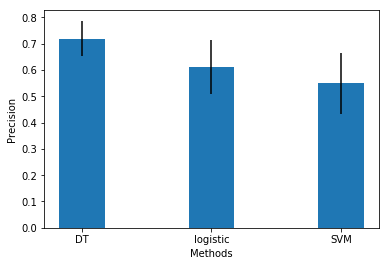

[0.7195652173913044, 0.6101449275362318, 0.5492753623188407]
[0.06765522188655669, 0.10263444622842272, 0.11561179192202659]


In [525]:
# 
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
all_sentence=labelData
performanceMean = []
performanceStd = []
for method in range(0,3):
    performanceMethod = [item[method] for item in performance]
    performanceMean.append(mean(performanceMethod)) 
    performanceStd.append(statistics.stdev(performanceMethod)) 
ind = np.arange(3)
y = performanceMean
e = performanceStd
# the width of the bars
width = 0.35   
plt.xlabel('Methods')
plt.ylabel('Precision')
plt.bar(ind, y, width,yerr=e)
plt.xticks(ind, ('DT', 'logistic', 'SVM'))
plt.show()
print(performanceMean)
print(performanceStd)

In [412]:
# train negation classifier using all annotated data
negclf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy',random_state=42))
])
X, y = transform_to_dataset_neg(all_sentence)
negclf.fit(X, y) 
print('negation clssifier training completed')

negation clssifier training completed


In [413]:
# isolator lexicon build
isolatorLex = ['then','but','and']
stemming(WordTokenizerFct(['then','but','and']))
print("Node2vec most similar to isolator: %s" %(model_brown.wv.most_similar(positive=isolatorLex,topn=1000)))

Node2vec most similar to isolator: [('right-hand', 0.9895427823066711), ('nonpregn', 0.9888820052146912), ('bodyweight', 0.9849771857261658), ('disclosur', 0.9848459362983704), ('grip', 0.9813375473022461), ('spent', 0.9798216819763184), ('steadili', 0.9753434658050537), ('half-clear', 0.9749642610549927), ('pedal', 0.9737948775291443), ('jejuni', 0.9710413217544556), ('congen', 0.9694331288337708), ('stainless', 0.9690388441085815), ('bandwidth', 0.9683252573013306), ('spontan', 0.9683191180229187), ('lard', 0.9672876000404358), ('pretransfus', 0.9668915271759033), ('pearson', 0.9645341634750366), ('cumul', 0.9644444584846497), ('intraclass', 0.9637778401374817), ('fals', 0.9636458158493042), ('kt/v', 0.9632045030593872), ('curvilinear', 0.9629087448120117), ('soae', 0.9626044034957886), ('larval', 0.962060809135437), ('fvc', 0.9600931406021118), ('workload', 0.9583043456077576), ('ssp', 0.9575445652008057), ('normoglycem', 0.9574189782142639), ('rm', 0.9570874571800232), ('theophylli

In [414]:
# extract isolator examples
isolatorHash = {}
for isolator in isolatorLex:
    isolatorHash[isolator] = 0
print(isolatorHash)
import copy
isolatorSamples = []
for i in sentenceResult:
    Hash=copy.deepcopy(isolatorHash)
    sentenceTokens = WordTokenizerFct([i['sentence']])[0]
    signal = 0
    for token in sentenceTokens:    
        if(token in isolatorLex):
            signal = 1
            pst=Hash[token]
            tokenString = token+'>'+str(pst)
            isolatorSamples.append({"sentence":i['sentence'],"isltr":tokenString})
            Hash[token] = Hash[token]+1
        
print(len(isolatorSamples))


{'and': 0, 'then': 0, 'but': 0}
1169


In [415]:
# export the isolator examples
isolatorSamples[0]
Write = open(r"isolatorSamples.txt","w")
for isolator in isolatorSamples:
    sentence = isolator["sentence"]
    isltr = isolator["isltr"]
    Write.write(sentence+"\t"+isltr+"\n")

In [416]:
# build pairs2isolator feature-based extraction function
def pairs2isolator(doc, isolatorString):
    hashTable={}
    hashTable['bias']=""
    tokens = [w for w, t in doc]
    tags = [t for w, t in doc]
    isolatorArray = isolatorString.split(">")
    isolator = isolatorArray[0]
    isolatorPst = isolatorArray[1]
    isolatorSet = []
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        if token == isolator:
            isolatorSet.append([token,tokenIndex])
    #print(isolatorSet)
    #print(doc)
    #print(isolatorString)
    word = isolatorSet[int(isolatorPst)][0]
    wordPst = isolatorSet[int(isolatorPst)][1]

    #print(str(tokenSource)+"\t"+str(tokenTarget))
    #print(str(tokenPos)+"\t"+str(len(tags))+"\n")
    # Common features for all words           
    hashTable['word.lower']=str(word.lower())
    hashTable['word-1']=str(tokens[wordPst-1])
    hashTable['word.captialized']= str(word[0].upper() == word[0])
    hashTable['postag']=  str(tags[wordPst])
    hashTable['postag-1']= "" if wordPst <= 1 else str(tags[wordPst-1])
    hashTable['postag-2']= "" if wordPst <= 2 else str(tags[wordPst-2])
    hashTable['postag+1']= "" if len(tags)-wordPst <= 1 else str(tags[wordPst+1])
    hashTable['postag+2']= "" if len(tags)-wordPst <= 2 else str(tags[wordPst+2])
    return hashTable
sentence = "The amount of viral particles released from the cells 2 days after -7124- and/or -3569- stimulation was lower at 39 degrees C than at 37 degrees C, and this was not a consequence of an intracellular accumulation of virions at 39 degrees C$"
pairs2isolator(sentenceTagger(sentence),"and>0")

{'bias': '',
 'postag': 'CC',
 'postag+1': 'DT',
 'postag+2': 'VBD',
 'postag-1': ',',
 'postag-2': 'NNP',
 'word-1': ',',
 'word.captialized': 'False',
 'word.lower': 'and'}

In [518]:
# read the human annotated isolator examples
ReadRef = open(r"isolatorAnnotated.txt","r")
labelData = []
for line in ReadRef.readlines():
    line = line.strip()
    elmts = line.split("\t")
    sentence=elmts.pop(0)
    #print(line+"\n")
    #print(elmts)
    label = elmts[1]
    isolator = elmts[0]
    labelData.append([label,isolator,sentence])


25


In [519]:
# transform to dataset isolator function
def transform_to_dataset_iso(tagged_sentences):
    X, y = [], []
    for tagged in tagged_sentences:
        X.append(pairs2isolator(sentenceTagger(tagged[2]), tagged[1]))
        y.append(tagged[0])
    return X, y
X,y=transform_to_dataset_iso(labelData)

In [520]:
# internal performance evaluation of isolator classifier
all_sentence=labelData
kf = KFold(n_splits=5,shuffle = True)
kf.get_n_splits(all_sentence)
print(kf)
performance = []
for train_index, test_index in kf.split(all_sentence):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    #print(train_index)
    #print(len([j for i,j in enumerate(all_sentence) if i in test_index]))
    X, y = transform_to_dataset_iso([j for i,j in enumerate(all_sentence) if i in train_index])
    clfDecisionTree.fit(X, y)
    clfLogistic.fit(X, y)
    clfSVM.fit(X, y)
    #clfNeural.fit(X, y)
    X_test, y_test = transform_to_dataset_iso([j for i,j in enumerate(all_sentence) if i in test_index])
    print("Accuracy of decisiontree:", clfDecisionTree.score(X_test, y_test))
    print("Accuracy of logistic:", clfLogistic.score(X_test, y_test))
    print("Accuracy of SVM:", clfSVM.score(X_test, y_test))
    performance.append([clfDecisionTree.score(X_test, y_test),clfLogistic.score(X_test, y_test),clfSVM.score(X_test, y_test)])

    #for i in range(len(y_test)):     
    #    sys.stdout.write(y_test[i])
    #    sys.stdout.write(clfDecisionTree.predict(X_test)[i])
    #    sys.stdout.write(clfLogistic.predict(X_test)[i])
    #    print(clfSVM.predict(X_test)[i])

KFold(n_splits=5, random_state=None, shuffle=True)
('TRAIN:', 20, 'TEST:', 5)
('Accuracy of decisiontree:', 0.8)
('Accuracy of logistic:', 0.6)
('Accuracy of SVM:', 0.8)
('TRAIN:', 20, 'TEST:', 5)
('Accuracy of decisiontree:', 0.8)
('Accuracy of logistic:', 0.8)
('Accuracy of SVM:', 0.2)
('TRAIN:', 20, 'TEST:', 5)
('Accuracy of decisiontree:', 0.8)
('Accuracy of logistic:', 0.8)
('Accuracy of SVM:', 0.2)
('TRAIN:', 20, 'TEST:', 5)
('Accuracy of decisiontree:', 1.0)
('Accuracy of logistic:', 1.0)
('Accuracy of SVM:', 0.2)
('TRAIN:', 20, 'TEST:', 5)
('Accuracy of decisiontree:', 0.8)
('Accuracy of logistic:', 0.8)
('Accuracy of SVM:', 0.2)


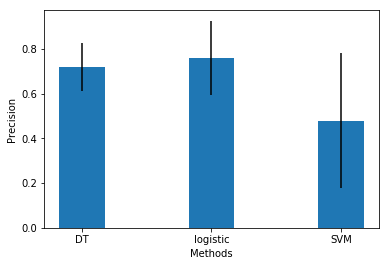

[0.72, 0.76, 0.4800000000000001]
[0.10954451150103327, 0.16733200530681513, 0.30331501776206204]


In [509]:
# The isolation result plot
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
all_sentence=labelData
performanceMean = []
performanceStd = []
for method in range(0,3):
    performanceMethod = [item[method] for item in performance]
    performanceMean.append(mean(performanceMethod)) 
    performanceStd.append(statistics.stdev(performanceMethod)) 
ind = np.arange(3)
y = performanceMean
e = performanceStd
# the width of the bars
width = 0.35
plt.xlabel('Methods')
plt.ylabel('Precision')
plt.bar(ind, y, width,yerr=e)
plt.xticks(ind, ('DT', 'logistic', 'SVM'))
plt.show()
print(performanceMean)
print(performanceStd)

In [450]:
# train negation classifier using all annotated data
all_sentence=labelData
isoclf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('clf', LogisticRegression(random_state=42))
])
X, y = transform_to_dataset_iso(all_sentence)
isoclf.fit(X, y) 
print('isolator clssifier training completed')

isolator clssifier training completed


In [451]:
# build regulation (activate) lexicon and stemmed regulation (activate) lexicon
positiveLex = ['activate', 'activation', 'activator', 'stimulatory', 'stimulation', 'stimulate', 'increase','increased']
cosPosLex = ['activated','stimulated','activates','elevation','-stimulated','increases','up-regulation','activators','upregulate','enhanced','enhancement','stimulating','stimulator','elevate','augments','trigger','upregulates','inducer','up-regulated','augmented']
stemPosLex = np.unique(stemming([positiveLex+cosPosLex])[0])
stemPosLex

array(['-stimul', 'activ', 'augment', 'elev', 'enhanc', 'increas',
       'induc', 'stimul', 'stimulatori', 'trigger', 'up-regul', 'upregul'],
      dtype='|S11')

In [452]:
# build regulation (inhibit) lexicon and stemmed regulation (inhibit) lexicon
negativeLex = ['inhibit', 'inhibitors', 'inhibitor', 'inhibition', 'repress', 'repression', 'repressor', 'block']
cosNegLex = ['inhibiting', 'blocking', 'inhibitory', 'blocked', 'down-regulation','downregulation','inactivate','suppress','suppression','antagonism','antagonists','blockers','represses','blockage','inactivated','decline']
stemNegLex = np.unique(stemming([negativeLex+cosNegLex])[0])
stemNegLex

array(['antagon', 'antagonist', 'block', 'blockag', 'blocker', 'declin',
       'down-regul', 'downregul', 'inactiv', 'inhibit', 'inhibitor',
       'inhibitori', 'repress', 'repressor', 'suppress'], dtype='|S10')

In [453]:
# extract examples
regulationSamples = []
for i in sentenceResult:
    tokenTag = []
    sentenceTokens = WordTokenizerFct([i['sentence']])[0]
    sentenceTokensStem = stemming([sentenceTokens])[0]
    #print(sentenceTokens)
    #print(sentenceTokensStem)
    signal = 0
    for token in sentenceTokensStem:
        
        if(token in stemNegLex or token in stemPosLex):
            tokenTag.append((token,"R"))
            signal = 1        
        else:
            tokenTag.append((token,"O"))
            
    if(signal == 1):
        regulationSamples.append(i)

print(len(regulationSamples))

370


In [454]:
# export the regulation samples
regSampleData = []
Write = open(r"regulationSamples.txt","w")
for line in regulationSamples:
    mentions = line['metions']
    for geneIndexA in range(0,len(mentions)):
        for geneIndexB in range(geneIndexA+1,len(mentions)):
            geneA = mentions[geneIndexA]
            geneB = mentions[geneIndexB]
            if(not geneA[1] == geneB[1] and not geneA[0] == geneB[0]):
                Write.write(str(line['PMID']))
                geneAnew = geneA[0]+">"+geneA[1]+">"+str(geneA[2])
                geneBnew = geneB[0]+">"+geneB[1]+">"+str(geneB[2])
                Write.write("\t"+line['sentence'])
                Write.write("\t"+geneAnew)
                Write.write("\t"+geneBnew)
                Write.write("\n")
                regSampleData.append([line['sentence'],geneAnew,geneBnew])
                
Write.close()
print(len(regSampleData))


820


In [455]:
# build the pair2regulation feature-based function
def pairs2reg(doc, source, target, isolatorTokens=[]):
    hashTable={}
    #hashTable['bias']=""
    
    tokens = [w for w, t in doc]
    tags = [t for w, t in doc]
    regulator = []
    
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        if stemming([[token]])[0] in stemPosLex:
            regulator.append([token,tokenIndex,"up"])
        if stemming([[token]])[0] in stemNegLex:
            regulator.append([token,tokenIndex,"down"])
            
    sourceElmts=source.split(">")
    targetElmts=target.split(">")
    sourceSymbol = sourceElmts[0]
    targetSymbol = targetElmts[0]
    sourceList = sourceElmts[2]
    targetList = targetElmts[2]    
    
    tokenSourceSet = []
    tokenTargetSet = []
    #print(tokens)
    #print(sourceSymbol+"\t"+targetSymbol+"\n")
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        
        # ( or ) problem
        if(len(token)==1):
            continue
        if(re.search(sourceSymbol,token) or re.search(token,sourceSymbol)):
            tokenSourceSet.append(tokenIndex)
        if(re.search(targetSymbol,token) or re.search(token,targetSymbol)):        
            tokenTargetSet.append(tokenIndex)
    try:
        tokenSource=tokenSourceSet[int(sourceList)]
        #print(tokenSource)
    except:
        print("error since the tokenSourceSet")
        print(tokens)
        print(source)
        print(tokenSourceSet)
        print(re.search(token,sourceSymbol))
        print(int(sourceList))        
    try:
        tokenTarget=tokenTargetSet[int(targetList)]
        #print(tokenTarget)
    except:
        print("error since the tokenTargetSet")
        print(tokens)
        print(target)
        print(tokenTargetSet)
        print(int(targetList))
    #print(str(tokenSource)+"\t"+str(tokenTarget))
    if(len(isolatorTokens)==0):
        for regIndex in range(0,len(regulator)):
            word = regulator[regIndex][0]
            tokenPst = regulator[regIndex][1]
            tokenDir = regulator[regIndex][2]
               
            #print(str(tokenPos)+"\t"+str(len(tags))+"\n")
            # Common features for all words     
            hashTable[str(regIndex) +'word.lower']=str(word.lower())
            hashTable[str(regIndex)+'word.captialized']= str(word[0].upper() == word[0])
            hashTable[str(regIndex)+'postag']=  str(tags[tokenPst])
            hashTable[str(regIndex)+'postag-1']= "" if tokenPst <= 1 else str(tags[tokenPst-1])
            hashTable[str(regIndex)+'postag-2']= "" if tokenPst <= 2 else str(tags[tokenPst-2])
            hashTable[str(regIndex)+'postag+1']= "" if len(tags)-tokenPst <= 1 else str(tags[tokenPst+1])
            hashTable[str(regIndex)+'postag+2']= "" if len(tags)-tokenPst <= 2 else str(tags[tokenPst+2])
            hashTable[str(regIndex)+'toSource']= str(tokenPst - tokenSource>0)
            hashTable[str(regIndex)+'toTarget']= str(tokenPst - tokenTarget>0)
            hashTable[str(regIndex)+'dir']= tokenDir
    else:
        newIndex = 0
        for regIndex in range(0,len(regulator)):
            for isolatorTkn in isolatorTokens:   
                word = regulator[regIndex][0]
                tokenPst = regulator[regIndex][1]
                tokenDir = regulator[regIndex][2]
                if(tokenPst in range(isolatorTkn['start'],isolatorTkn['end']+1) and tokenSource in range(isolatorTkn['start'],isolatorTkn['end']+1) and tokenTarget in range(isolatorTkn['start'],isolatorTkn['end']+1)):
                    hashTable[str(newIndex) +'word.lower']=str(word.lower())
                    hashTable[str(newIndex)+'word.captialized']= str(word[0].upper() == word[0])
                    hashTable[str(newIndex)+'postag']=  str(tags[tokenPst])
                    hashTable[str(newIndex)+'postag-1']= "" if tokenPst <= 1 else str(tags[tokenPst-1])
                    hashTable[str(newIndex)+'postag-2']= "" if tokenPst <= 2 else str(tags[tokenPst-2])
                    hashTable[str(newIndex)+'postag+1']= "" if len(tags)-tokenPst <= 1 else str(tags[tokenPst+1])
                    hashTable[str(newIndex)+'postag+2']= "" if len(tags)-tokenPst <= 2 else str(tags[tokenPst+2])
                    hashTable[str(newIndex)+'toSource']= str(tokenPst - tokenSource>0)
                    hashTable[str(newIndex)+'toTarget']= str(tokenPst - tokenTarget>0)
                    hashTable[str(newIndex)+'dir']= tokenDir
                    newIndex+=1
    return hashTable

In [457]:
sentence = "The amount of viral particles released from the cells 2 days after -7124- and/or -3569- stimulation was lower at 39 degrees C than at 37 degrees C, and this was not a consequence of an intracellular accumulation of virions at 39 degrees C$"
pairs2reg(sentenceTagger(sentence),'-3569->3569>0','-7124->7124>0')

{'0dir': 'up',
 '0postag': 'NN',
 '0postag+1': 'VBD',
 '0postag+2': 'JJR',
 '0postag-1': 'NNP',
 '0postag-2': 'NN',
 '0toSource': 'True',
 '0toTarget': 'True',
 '0word.captialized': 'False',
 '0word.lower': 'stimulation'}

In [528]:
# read the regulation annotated samples
ReadRef = open(r"regulationAnnotated.txt","r")
labelData = []
for line in ReadRef.readlines():
    line = line.strip()
    elmts = line.split("\t")
    pmid=elmts.pop(0)
    sentence=elmts.pop(0)
    #print(pmid+"\n"+sentence+"\n")
    #print(elmts)
    label = elmts[2]
    source = elmts[0]
    target = elmts[1]
    labelData.append([label,source,target,sentence])
print(len(labelData))

102


In [529]:
# transform dataset to regulation function
def transform_to_dataset_reg(tagged_sentences):
    X, y = [], []
    for tagged in tagged_sentences:
        X.append(pairs2reg(sentenceTagger(tagged[3]), tagged[1], tagged[2]))
        y.append(tagged[0])
    return X, y

In [530]:
# regulation classifier performance comparison 
all_sentence=labelData
kf = KFold(n_splits=5,shuffle = True)
kf.get_n_splits(all_sentence)
print(kf)
performance = []

for train_index, test_index in kf.split(all_sentence):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    #print(train_index)
    #print(len([j for i,j in enumerate(all_sentence) if i in test_index]))
    X, y = transform_to_dataset_reg([j for i,j in enumerate(all_sentence) if i in train_index])
    clfDecisionTree.fit(X, y)
    clfLogistic.fit(X, y)
    clfSVM.fit(X, y)
    #clfNeural.fit(X, y)
    X_test, y_test = transform_to_dataset_reg([j for i,j in enumerate(all_sentence) if i in test_index])
    print("Accuracy of decisiontree:", clfDecisionTree.score(X_test, y_test))
    print("Accuracy of logistic:", clfLogistic.score(X_test, y_test))
    print("Accuracy of SVM:", clfSVM.score(X_test, y_test))
    performance.append([clfDecisionTree.score(X_test, y_test),clfLogistic.score(X_test, y_test),clfSVM.score(X_test, y_test)])
    #for i in range(len(y_test)):     
    #    sys.stdout.write(y_test[i])
    #    sys.stdout.write(clfDecisionTree.predict(X_test)[i])
    #    sys.stdout.write(clfLogistic.predict(X_test)[i])
    #    print(clfSVM.predict(X_test)[i])

KFold(n_splits=5, random_state=None, shuffle=True)
('TRAIN:', 81, 'TEST:', 21)
('Accuracy of decisiontree:', 0.9047619047619048)
('Accuracy of logistic:', 0.8571428571428571)
('Accuracy of SVM:', 0.6190476190476191)
('TRAIN:', 81, 'TEST:', 21)
('Accuracy of decisiontree:', 0.7619047619047619)
('Accuracy of logistic:', 0.7619047619047619)
('Accuracy of SVM:', 0.5714285714285714)
('TRAIN:', 82, 'TEST:', 20)
('Accuracy of decisiontree:', 0.8)
('Accuracy of logistic:', 0.85)
('Accuracy of SVM:', 0.6)
('TRAIN:', 82, 'TEST:', 20)
('Accuracy of decisiontree:', 0.8)
('Accuracy of logistic:', 0.95)
('Accuracy of SVM:', 0.65)
('TRAIN:', 82, 'TEST:', 20)
('Accuracy of decisiontree:', 0.8)
('Accuracy of logistic:', 0.85)
('Accuracy of SVM:', 0.65)


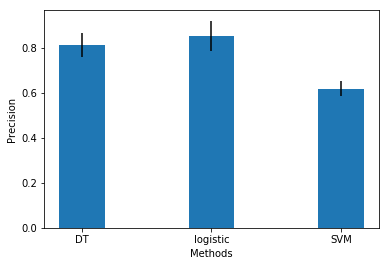

[0.8133333333333332, 0.8538095238095238, 0.6180952380952381]
[0.05370617973284452, 0.06659434853075617, 0.0336969958356034]


In [531]:
# The regulation classifier result plot
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
all_sentence=labelData
performanceMean = []
performanceStd = []
for method in range(0,3):
    performanceMethod = [item[method] for item in performance]
    performanceMean.append(mean(performanceMethod)) 
    performanceStd.append(statistics.stdev(performanceMethod)) 
ind = np.arange(3)
y = performanceMean
e = performanceStd
# the width of the bars
width = 0.35
plt.xlabel('Methods')
plt.ylabel('Precision')
plt.bar(ind, y, width,yerr=e)
plt.xticks(ind, ('DT', 'logistic', 'SVM'))
plt.show()
print(performanceMean)
print(performanceStd)

In [462]:
# train regulation classifier using all annotated data
X,y=transform_to_dataset_reg(labelData)
print(len(labelData))
regclf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy',random_state=42))
])
regclf.fit(X, y)
 
print('regulation classifier training completed')

102
regulation classifier training completed


In [473]:
# assemble feature-based function
def pairs2assemble(doc, source, target):
    hashTable={}
    hashTable['bias']=""
    tokens = [w for w, t in doc]
    tags = [t for w, t in doc]
    regulator = []
    Hash=copy.deepcopy(isolatorHash)
    isolatorSamples = []
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        if(token in isolatorLex):
            pst=Hash[token]
            tokenString = token+'>'+str(pst)
            isolatorSamples.append({"isltr":tokenString,"index":tokenIndex})
            Hash[token] = Hash[token]+1
    preIsoIndex = []
    mark = 0
    for isolator in isolatorSamples:
        preIso = isoclf.predict(pairs2isolator(doc,isolator["isltr"]))
        #print(preIso)
        if(preIso=="t"):
            #print(isolator["isltr"]);
            mark = 1
            if(len(preIsoIndex)==0):
                preIsoIndex.append({'start':0,'end':isolator["index"]})
            else:
                preIsoIndex.append({'start':preIsoIndex[-1]['end'],'end':isolator["index"]})
    if mark == 1:
        preIsoIndex.append({'start':preIsoIndex[-1]['end']+1,'end':len(tokens)})
        
    #print(preIsoIndex)
    sourceElmts=source.split(">")
    targetElmts=target.split(">")
    sourceSymbol = sourceElmts[0]
    targetSymbol = targetElmts[0]
    sourceList = sourceElmts[2]
    targetList = targetElmts[2]    
    tokenSourceSet = []
    tokenTargetSet = [] 
    #print(tokens)
    #print(sourceSymbol+"\t"+targetSymbol+"\n")
    for tokenIndex in range(0,len(tokens)):
        token = tokens[tokenIndex]
        # ( or ) problem
        if(len(token)==1):
            continue
        if(re.search(sourceSymbol,token) or re.search(token,sourceSymbol)):
            tokenSourceSet.append(tokenIndex)
        if(re.search(targetSymbol,token) or re.search(token,targetSymbol)):        
            tokenTargetSet.append(tokenIndex)
    try:
        tokenSource=tokenSourceSet[int(sourceList)]
        #print(tokenSource)
    except:
        print("error since the tokenSourceSet")
        print(tokens)
        print(source)
        print(tokenSourceSet)
        print(re.search(token,sourceSymbol))
        print(int(sourceList))        
    try:
        tokenTarget=tokenTargetSet[int(targetList)]
        #print(tokenTarget)
    except:
        print("error since the tokenTargetSet")
        print(tokens)
        print(target)
        print(tokenTargetSet)
        print(int(targetList))
    #print(str(tokenSource)+"\t"+str(tokenTarget))
    
    isoMark = 0
    for preIso in preIsoIndex:
        start = preIso['start']
        end = preIso['end']
        if((tokenSource in range(start,end+1) and tokenTarget not in range(start,end+1)) or (tokenTarget in range(start,end+1) and tokenSource not in range(start,end+1))):
            isoMark = 1
            break
   
        
    preNeg=negclf.predict(pairs2negation(doc,source,target,preIsoIndex))
    preReg=regclf.predict(pairs2reg(doc,source,target,preIsoIndex))
    #print(pairs2reg(doc,source,target,preIsoIndex))
    #print(preReg)
    #print(str(tokenPos)+"\t"+str(len(tags))+"\n")
    # Common features for all words     
    
    hashTable['isoMark'] = isoMark
    hashTable['preReg'] = preReg[0]
    hashTable['preNeg'] = preNeg[0]
    return hashTable

In [464]:
sentence = "The amount of viral particles released from the cells 2 days after -7124- and/or -3569- stimulation was lower at 39 degrees C than at 37 degrees C, and this was not a consequence of an intracellular accumulation of virions at 39 degrees C$"
pairs2assemble(sentenceTagger(sentence),'-3569->3569>0','-7124->7124>0')

[{'index': 28, 'isltr': 'and>0'}]
[{'start': 0, 'end': 28}, {'start': 29, 'end': 45}]


{'bias': '', 'isoMark': 0, 'preNeg': 'Affirmative', 'preReg': 'Affirmative'}

In [465]:
def transform_to_dataset_assemble(tagged_sentences):
    X, y = [], []

    for tagged in tagged_sentences:
        X.append(pairs2assemble(sentenceTagger(tagged[3]), tagged[1], tagged[2]))
        y.append(tagged[0])
    return X, y


In [532]:
ReadRef = open(r"regulationAnnotatedAll.txt","r")
labelData = []
for line in ReadRef.readlines():
    line = line.strip()
    elmts = line.split("\t")
    pmid=elmts.pop(0)
    sentence=elmts.pop(0)
    #print(pmid+"\n"+sentence+"\n")
    #print(elmts)
    label = elmts[2]
    source = elmts[0]
    target = elmts[1]
    labelData.append([label,source,target,sentence])
print(len(labelData))

400


In [533]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
all_sentence=labelData
clfDecisionTreeAsm = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy',random_state=42))
])
clfSVMAsm = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('clf', svm.SVC(random_state=42))
])
clfLogisticAsm= Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('clf', LogisticRegression(random_state=42))
])
kf = KFold(n_splits=5,shuffle = True)
kf.get_n_splits(all_sentence)
print(kf)
performance = []
for train_index, test_index in kf.split(all_sentence):

    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    #print(train_index)
    #print(len([j for i,j in enumerate(all_sentence) if i in test_index]))

    X, y = transform_to_dataset_reg([j for i,j in enumerate(all_sentence) if i in train_index])
    regclf.fit(X, y)
    X_test_reg, y_test_reg = transform_to_dataset_reg([j for i,j in enumerate(all_sentence) if i in test_index])
    print("Accuracy:", regclf.score(X_test_reg, y_test_reg))
        
    X, y = transform_to_dataset_assemble([j for i,j in enumerate(all_sentence) if i in train_index])
    clfDecisionTreeAsm.fit(X, y)
    clfLogisticAsm.fit(X, y)
    clfSVMAsm.fit(X, y)
    X_test, y_test = transform_to_dataset_assemble([j for i,j in enumerate(all_sentence) if i in test_index])
    
    print("Accuracy:", clfDecisionTreeAsm.score(X_test, y_test))
    print("Accuracy:", clfLogisticAsm.score(X_test, y_test))
    print("Accuracy:", clfSVMAsm.score(X_test, y_test))
    performance.append([regclf.score(X_test_reg, y_test_reg),clfDecisionTreeAsm.score( X_test, y_test),clfLogisticAsm.score( X_test, y_test),clfSVMAsm.score( X_test, y_test)])
    #for n in range(len(y_test)):
        
        #sys.stdout.write(y_test[n])
        #sys.stdout.write(regclf.predict(X_test_reg)[n])
        #print(clfDecisionTreeAsm.predict(X_test)[n])
        #print(X_test[n])
        #print([j for i,j in enumerate(all_sentence) if i in test_index][n])
    

KFold(n_splits=5, random_state=None, shuffle=True)
('TRAIN:', 320, 'TEST:', 80)
('Accuracy:', 0.8125)
('Accuracy:', 0.8375)
('Accuracy:', 0.8375)
('Accuracy:', 0.8375)
('TRAIN:', 320, 'TEST:', 80)
('Accuracy:', 0.825)
('Accuracy:', 0.825)
('Accuracy:', 0.825)
('Accuracy:', 0.825)
('TRAIN:', 320, 'TEST:', 80)
('Accuracy:', 0.7875)
('Accuracy:', 0.8125)
('Accuracy:', 0.8)
('Accuracy:', 0.8)
('TRAIN:', 320, 'TEST:', 80)
('Accuracy:', 0.8125)
('Accuracy:', 0.825)
('Accuracy:', 0.825)
('Accuracy:', 0.825)
('TRAIN:', 320, 'TEST:', 80)
('Accuracy:', 0.8125)
('Accuracy:', 0.85)
('Accuracy:', 0.85)
('Accuracy:', 0.85)


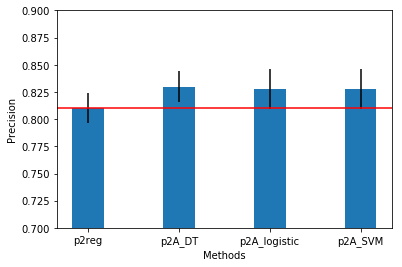

[0.8099999999999999, 0.8300000000000001, 0.8275, 0.8275]
[0.01369306393762915, 0.014252192813739227, 0.01854049621773914, 0.01854049621773914]


In [535]:
performanceMean = []
performanceStd = []
for method in range(0,4):
    performanceMethod = [item[method] for item in performance]
    performanceMean.append(mean(performanceMethod)) 
    performanceStd.append(statistics.stdev(performanceMethod)) 
ind = np.arange(4)
y = performanceMean
e = performanceStd
plt.axhline(y=performanceMean[0], color='r', linestyle='-')
# the width of the bars
width = 0.35
plt.ylim((0.70,0.90))
plt.xlabel('Methods')
plt.ylabel('Precision')
plt.bar(ind, y, width,yerr=e)
plt.xticks(ind, ('p2reg','p2A_DT', 'p2A_logistic', 'p2A_SVM'))
plt.show()
print(performanceMean)
print(performanceStd)

In [ ]:
all_sentence=labelData
performanceMean = []
performanceStd = []
for method in range(0,3):
    performanceMethod = [item[method] for item in performance]
    performanceMean.append(mean(performanceMethod)) 
    performanceStd.append(statistics.stdev(performanceMethod)) 
ind = np.arange(3)
y = performanceMean
e = performanceStd
# the width of the bars
width = 0.35   
plt.bar(ind, y, width,yerr=e)
plt.xticks(ind, ('DT', 'logistic', 'SVM'))
plt.show()

In [468]:

sentc = "Furthermore, a partial -6908- complex containing Drosophila -37476- (d-6908-), human -6872-, -40134-, and -32762- supported activation by a Gal4- -7157- fusion protein in vitro, whereas -6908- or a subcomplex lacking -32762- and -40134- did not$"
src = "-6908->6908>1"
target = "-40134->40134>0"

In [472]:

print(sentenceTagger(sentc))
regclf.predict(pairs2reg(sentenceTagger(sentc),src, target))

[('Furthermore', 'RB'), (',', ','), ('a', 'DT'), ('partial', 'JJ'), ('-6908-', 'NNP'), ('complex', 'JJ'), ('containing', 'VBG'), ('Drosophila', 'NNP'), ('-37476-', 'NNP'), ('(', '('), ('d-6908-', 'NNP'), (')', ')'), (',', ','), ('human', 'JJ'), ('-6872-', 'NNP'), (',', ','), ('-40134-', 'NNP'), (',', ','), ('and', 'CC'), ('-32762-', 'NNP'), ('supported', 'VBD'), ('activation', 'NN'), ('by', 'IN'), ('a', 'DT'), ('Gal4-', 'NNP'), ('-7157-', 'NNP'), ('fusion', 'NN'), ('protein', 'NN'), ('in', 'IN'), ('vitro', 'NN'), (',', ','), ('whereas', 'JJ'), ('-6908-', 'NNP'), ('or', 'CC'), ('a', 'DT'), ('subcomplex', 'JJ'), ('lacking', 'NN'), ('-32762-', 'NNP'), ('and', 'CC'), ('-40134-', 'NNP'), ('did', 'VBD'), ('not', 'RB'), ('.', '.')]


array(['None'], dtype='|S11')

In [474]:
pairs2assemble(sentenceTagger(sentc),src, target)

{'bias': '', 'isoMark': 0, 'preNeg': 'Affirmative', 'preReg': 'Negation'}